<a href="https://colab.research.google.com/github/jjlee6496/one-by-one/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제1 : iris 데이터로 clustering 을 수행하시오 k=2, 3

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import seaborn as sns

iris=sns.load_dataset('iris')
X_features = iris[['sepal_length', 'sepal_width', 'petal_length','petal_width']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=2, random_state=156)
Y_labels = kmeans.fit_predict(X_features_scaled)

iris['clustered'] = Y_labels
iris

,sepal_length,sepal_width,petal_length,petal_width,species,clustered
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


In [ ]:
X_features = iris[['sepal_length', 'sepal_width', 'petal_length','petal_width']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=156)
Y_labels = kmeans.fit_predict(X_features_scaled)
Y_labels

iris['clustered'] = Y_labels
iris

,sepal_length,sepal_width,petal_length,petal_width,species,clustered
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


# 과제2 : iris 데이터로 clustering 결과를 시각화 하시오 k=2, 3, 4 일 때
* pairplot 과 비교하시오

In [ ]:
def clusterScatter(n_cluster, X_features): 
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화  , 0, 1 차원 
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1],
                     marker='o', color=c_color, edgecolor='black', s=50, 
                     label='cluster '+ str(i))       
    
    print (c_colors)
    #각 클러스터의 중심점을 삼각형으로 표시

    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
        
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

<function matplotlib.pyplot.tight_layout>

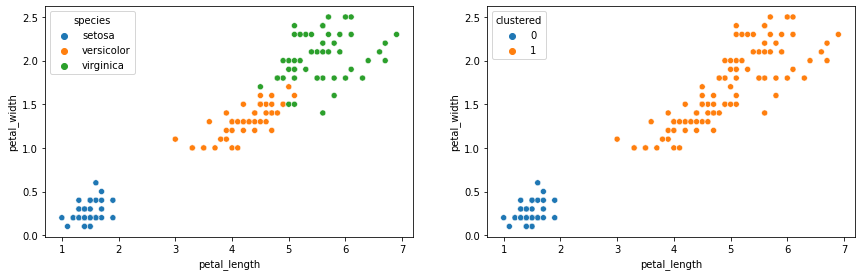

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

iris=sns.load_dataset('iris')
X_features = iris[['sepal_length', 'sepal_width', 'petal_length','petal_width']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

# K = 2

kmeans = KMeans(n_clusters=2, random_state=156)
Y_labels = kmeans.fit_predict(X_features_scaled)
Y_labels
iris['clustered'] = Y_labels

plt.subplots_adjust(left=0.125, bottom=0.1,  right=2, top=0.9, wspace=0.2, hspace=0.35)
plt.subplot(121)
sns.scatterplot(x='petal_length', y='petal_width',hue='species', data = iris)
plt.subplot(122)
sns.scatterplot(x='petal_length', y='petal_width',hue='clustered', data = iris)
plt.tight_layout

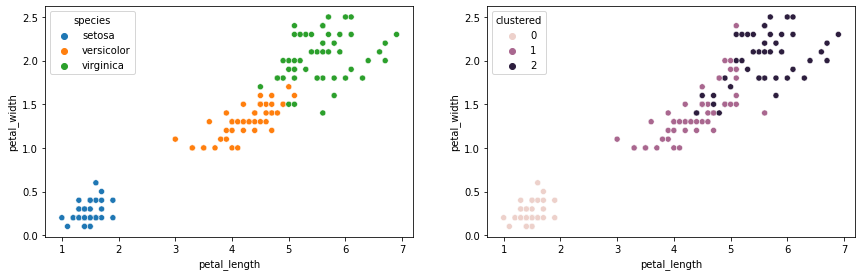

In [ ]:
# K = 3

kmeans = KMeans(n_clusters=3, random_state=156)
Y_labels = kmeans.fit_predict(X_features_scaled)
Y_labels
iris['clustered'] = Y_labels

plt.subplots_adjust(left=0.125, bottom=0.1,  right=2, top=0.9, wspace=0.2, hspace=0.35)
plt.subplot(121)
sns.scatterplot(x='petal_length', y='petal_width',hue='species', data = iris)
plt.subplot(122)
sns.scatterplot(x='petal_length', y='petal_width',hue='clustered', data = iris)

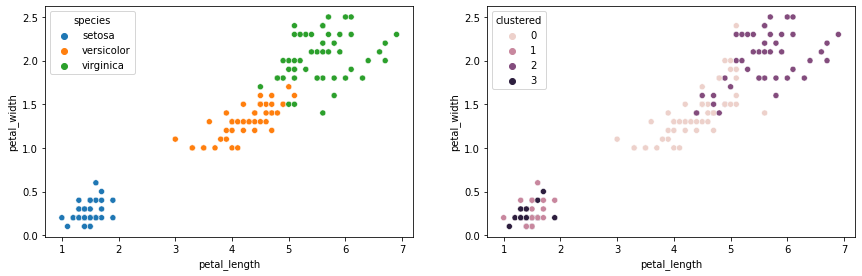

In [ ]:
# K = 4

kmeans = KMeans(n_clusters=4, random_state=156)
Y_labels = kmeans.fit_predict(X_features_scaled)
Y_labels
iris['clustered'] = Y_labels

plt.subplots_adjust(left=0.125, bottom=0.1,  right=2, top=0.9, wspace=0.2, hspace=0.35)
plt.subplot(121)
sns.scatterplot(x='petal_length', y='petal_width',hue='species', data = iris)
plt.subplot(122)
sns.scatterplot(x='petal_length', y='petal_width',hue='clustered', data = iris)

# 과제3 : iris 데이터로 clustering 결과를 실루엣 값 분석을 통해 최적의 k 값을 구하시오¶

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

iris=sns.load_dataset('iris')
X_features = iris[['sepal_length', 'sepal_width', 'petal_length','petal_width']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans2 = KMeans(n_clusters=2, random_state=156)
kmeans3 = KMeans(n_clusters=3, random_state=156)
kmeans4 = KMeans(n_clusters=4, random_state=156)
kmeans5 = KMeans(n_clusters=5, random_state=156)

Y_labels2 = kmeans2.fit_predict(X_features_scaled)
Y_labels3 = kmeans3.fit_predict(X_features_scaled)
Y_labels4 = kmeans4.fit_predict(X_features_scaled)


sv2 = silhouette_samples(X_features_scaled, Y_labels2, metric='euclidean')
sv3 = silhouette_samples(X_features_scaled, Y_labels3, metric='euclidean')
sv4 = silhouette_samples(X_features_scaled, Y_labels4, metric='euclidean')


np.mean(sv2),np.mean(sv3),np.mean(sv4)

(0.5817500491982808, 0.45994823920518646, 0.383850922475103)

수치만으로 보면 k=2가 높아 보인다. 시각화를 해보면

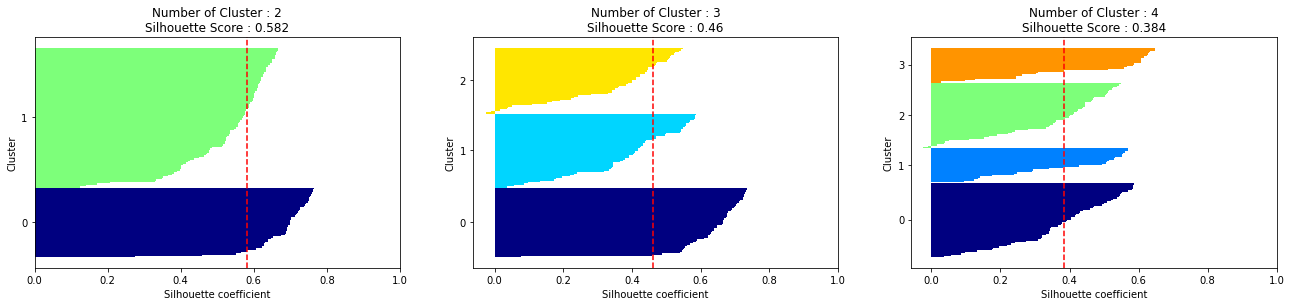

In [ ]:
from matplotlib import cm
def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=156)
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=3, top=0.9, wspace=0.2, hspace=0.35)
plt.subplot(131)
silhouetteViz(2, X_features_scaled)
plt.subplot(132)
silhouetteViz(3, X_features_scaled)
plt.subplot(133)
silhouetteViz(4, X_features_scaled)

시각화를 했을 때 k=3 or 4일때가 좋아보이지만 score는 3 이 더 높으므로 3이 가장 적절하다고 생각된다.

# 과제4 : iris 원래 class와 clustering 결과를 비교하여 accuracy를 구하시오
* 필요시 cluster된 label 변경

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

iris = sns.load_dataset('iris')

best_cluster = 3
kmeans = KMeans(n_clusters=best_cluster, random_state=156)
Y_labels = kmeans.fit_predict(X_features_scaled)
Y_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

과제 2를 보면 0,1,2 순으로 'setosa', 'versicolor', 'virginica' 인 것을 알 수 있다

In [ ]:
labels = Y_labels.astype('str')
lst = []
for string in labels:
  string = string.replace('0','setosa')
  string = string.replace('1','versicolor')
  string = string.replace('2','virginica')
  lst.append(string)
iris['clustered'] = lst
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,clustered
145,6.7,3.0,5.2,2.3,virginica,virginica
146,6.3,2.5,5.0,1.9,virginica,versicolor
147,6.5,3.0,5.2,2.0,virginica,virginica
148,6.2,3.4,5.4,2.3,virginica,virginica
149,5.9,3.0,5.1,1.8,virginica,versicolor


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy = accuracy_score(iris.species, iris.clustered)
print(f'정확도: {accuracy:.3f}')

정확도: 0.833
